<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2024-25

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 15th MAY @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [1]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'TechNovaInnovations'

### Function for loading data - do not change

In [2]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04',
                    'CyberWaveSolutions', 'TechNovaInnovations', 'QuantumByteSystems', 'NexGenCyberTech']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

/var/folders/_z/52lqqtb11v16z4fs2vr58jv40000gq/T/ipykernel_71519/1319915571.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
/var/folders/_z/52lqqtb11v16z4fs2vr58jv40000gq/T/ipykernel_71519/1319915571.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
/var/folders/_z/52lqqtb11v16z4fs2vr58jv40000gq/T/ipykernel_71519/1319915571.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = 

### The following code samples may be useful to aid your investigation

In [3]:
# This shows the employee_data DataFrame
employee_data

,user,role,email,pc
0,usr-bcc,Technical,usr-bcc@technova-innovations.net,pc0
1,usr-fxz,Legal,usr-fxz@technova-innovations.net,pc1
2,usr-jit,HR,usr-jit@technova-innovations.net,pc2
3,usr-bsv,HR,usr-bsv@technova-innovations.net,pc3
4,usr-num,Security,usr-num@technova-innovations.net,pc4
...,...,...,...,...
95,usr-vzu,Finance,usr-vzu@technova-innovations.net,pc95
96,usr-jmh,Legal,usr-jmh@technova-innovations.net,pc96
97,usr-vko,HR,usr-vko@technova-innovations.net,pc97
98,usr-jde,Director,usr-jde@technova-innovations.net,pc98


In [4]:
# This shows the login_data DataFrame
login_data

,datetime,user,action,pc
0,2018-01-01 00:10:58,usr-daf,login,pc62
1,2018-01-01 00:18:42,usr-eqs,login,pc48
2,2018-01-01 00:24:54,usr-vdy,login,pc31
3,2018-01-01 02:47:12,usr-gyv,login,pc73
4,2018-01-01 02:51:52,usr-lmw,login,pc79
...,...,...,...,...
36195,2018-06-30 23:01:02,usr-gxz,logoff,pc66
36196,2018-06-30 23:22:38,usr-tir,logoff,pc90
36197,2018-06-30 23:37:36,usr-vtc,logoff,pc27
36198,2018-06-30 23:47:41,usr-bcc,logoff,pc0


In [5]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-daf']

,datetime,user,action,pc
0,2018-01-01 00:10:58,usr-daf,login,pc62
177,2018-01-01 20:47:21,usr-daf,logoff,pc62
208,2018-01-02 03:44:44,usr-daf,login,pc62
390,2018-01-02 23:17:48,usr-daf,logoff,pc62
409,2018-01-03 02:50:46,usr-daf,login,pc62
...,...,...,...,...
35782,2018-06-28 20:39:13,usr-daf,logoff,pc62
35835,2018-06-29 05:56:34,usr-daf,login,pc62
35905,2018-06-29 14:30:36,usr-daf,logoff,pc62
36000,2018-06-30 00:21:09,usr-daf,login,pc62


In [6]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-daf', 'usr-bcc'])]

,datetime,user,action,pc
0,2018-01-01 00:10:58,usr-daf,login,pc62
21,2018-01-01 04:45:32,usr-bcc,login,pc0
172,2018-01-01 20:10:57,usr-bcc,logoff,pc0
177,2018-01-01 20:47:21,usr-daf,logoff,pc62
208,2018-01-02 03:44:44,usr-daf,login,pc62
...,...,...,...,...
35997,2018-06-29 23:45:09,usr-bcc,logoff,pc0
36000,2018-06-30 00:21:09,usr-daf,login,pc62
36045,2018-06-30 06:39:56,usr-bcc,login,pc0
36167,2018-06-30 18:00:36,usr-daf,logoff,pc62


In [7]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Technical', 'Legal', 'HR', 'Security', 'Services', 'Director',
       'Finance'], dtype=object)

In [8]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [9]:
# List all usernames that belong to the job role Finance
user_set['Technical']

['usr-bcc',
 'usr-tsn',
 'usr-gpq',
 'usr-biy',
 'usr-jwl',
 'usr-zob',
 'usr-tir',
 'usr-sdc',
 'usr-rez',
 'usr-ynd']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

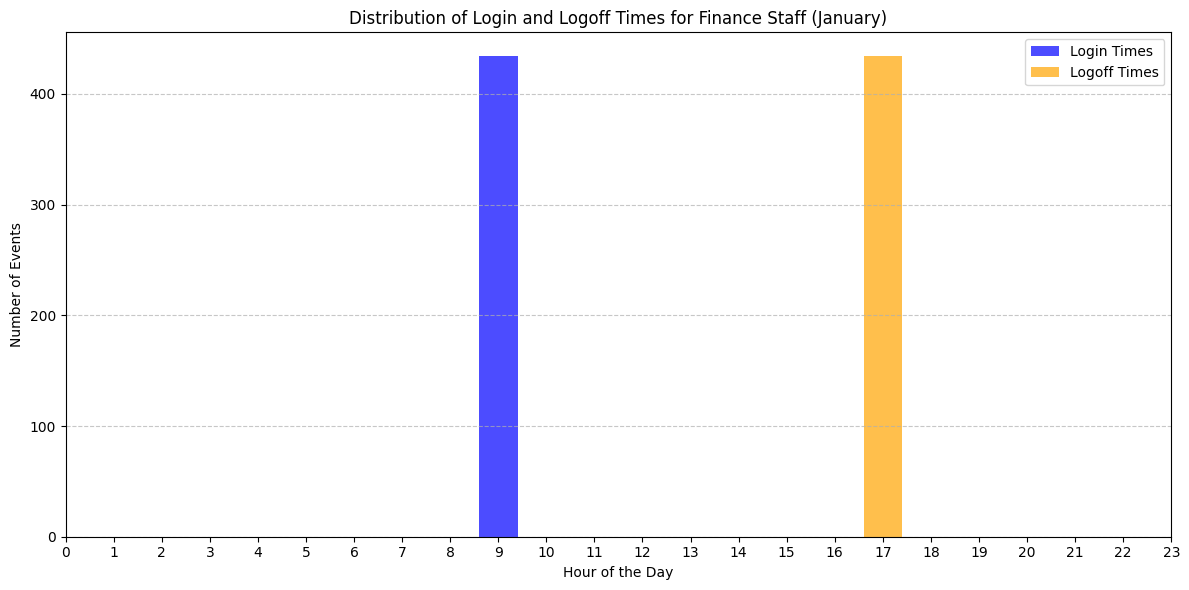

In [10]:
import matplotlib.pyplot as plt

finance_users = user_set['Finance']
finance_login_data = login_data[
    (login_data['user'].isin(finance_users)) & 
    (login_data['datetime'].dt.month == 1)
]
login_data_filtered = finance_login_data[finance_login_data['action'] == 'login'].copy()
logoff_data_filtered = finance_login_data[finance_login_data['action'] == 'logoff'].copy()

login_data_filtered['hour'] = login_data_filtered['datetime'].dt.hour
logoff_data_filtered['hour'] = logoff_data_filtered['datetime'].dt.hour

login_counts = login_data_filtered['hour'].value_counts().sort_index()
logoff_counts = logoff_data_filtered['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(login_counts.index, login_counts.values, alpha=0.7, label='Login Times', color='blue')
plt.bar(logoff_counts.index, logoff_counts.values, alpha=0.7, label='Logoff Times', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.title('Distribution of Login and Logoff Times for Finance Staff (January)')
plt.xticks(range(24)) 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



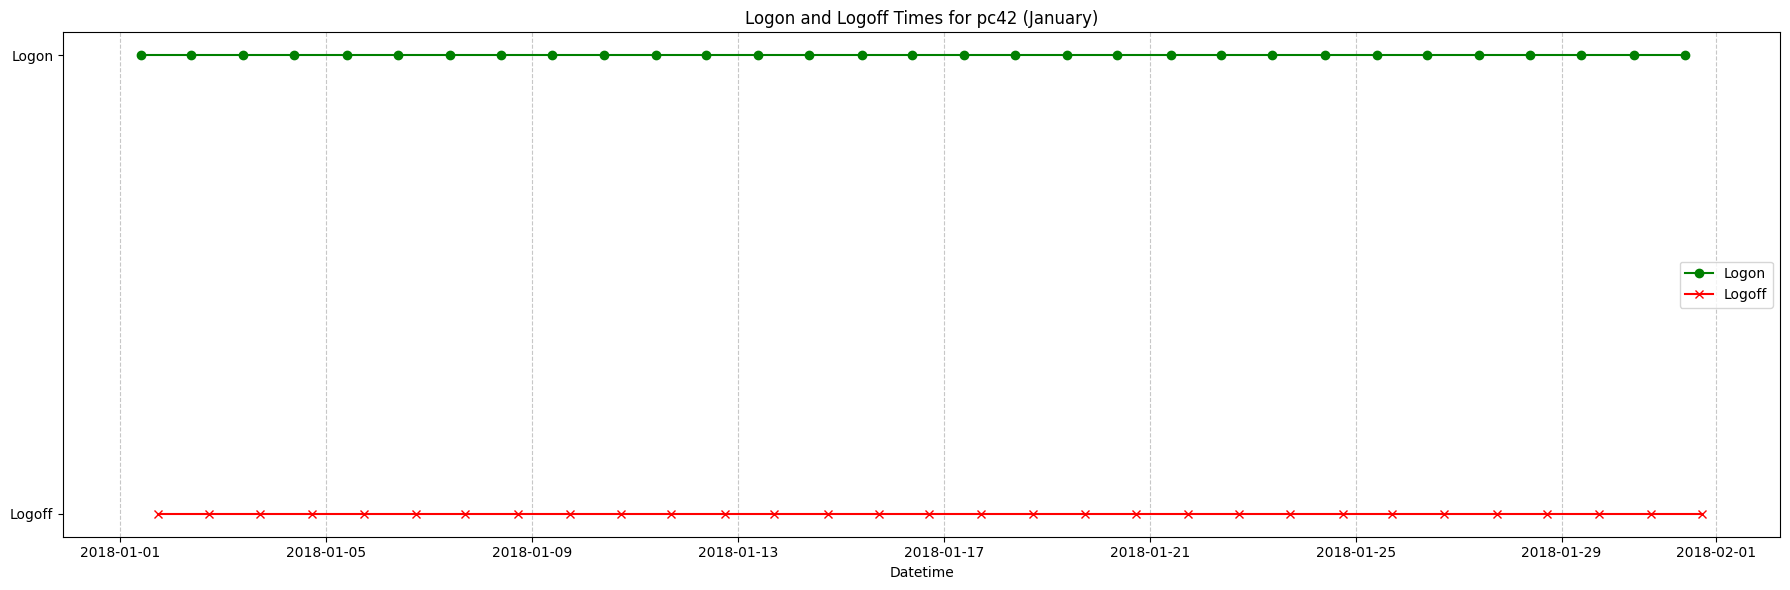

In [11]:
######### ADD YOUR CODE HERE ##########

# Step 1: Filter for pc42 and January
pc42_data = login_data[
    (login_data['pc'] == 'pc42') &
    (login_data['datetime'].dt.month == 1)
]

pc42_logon = pc42_data[pc42_data['action'] == 'login']
pc42_logoff = pc42_data[pc42_data['action'] == 'logoff']

plt.figure(figsize=(18, 6))

plt.plot(pc42_logon['datetime'], [1]*len(pc42_logon),
         label='Logon', color='green', marker='o')
plt.plot(pc42_logoff['datetime'], [0]*len(pc42_logoff),
         label='Logoff', color='red', marker='x')

plt.title('Logon and Logoff Times for pc42 (January)')
plt.xlabel('Datetime')
plt.yticks([0, 1], ['Logoff', 'Logon'])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2018. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

unfiltered emails sent by security staff: 575855
filtered emails sent by security staff: 215
edges length:  215


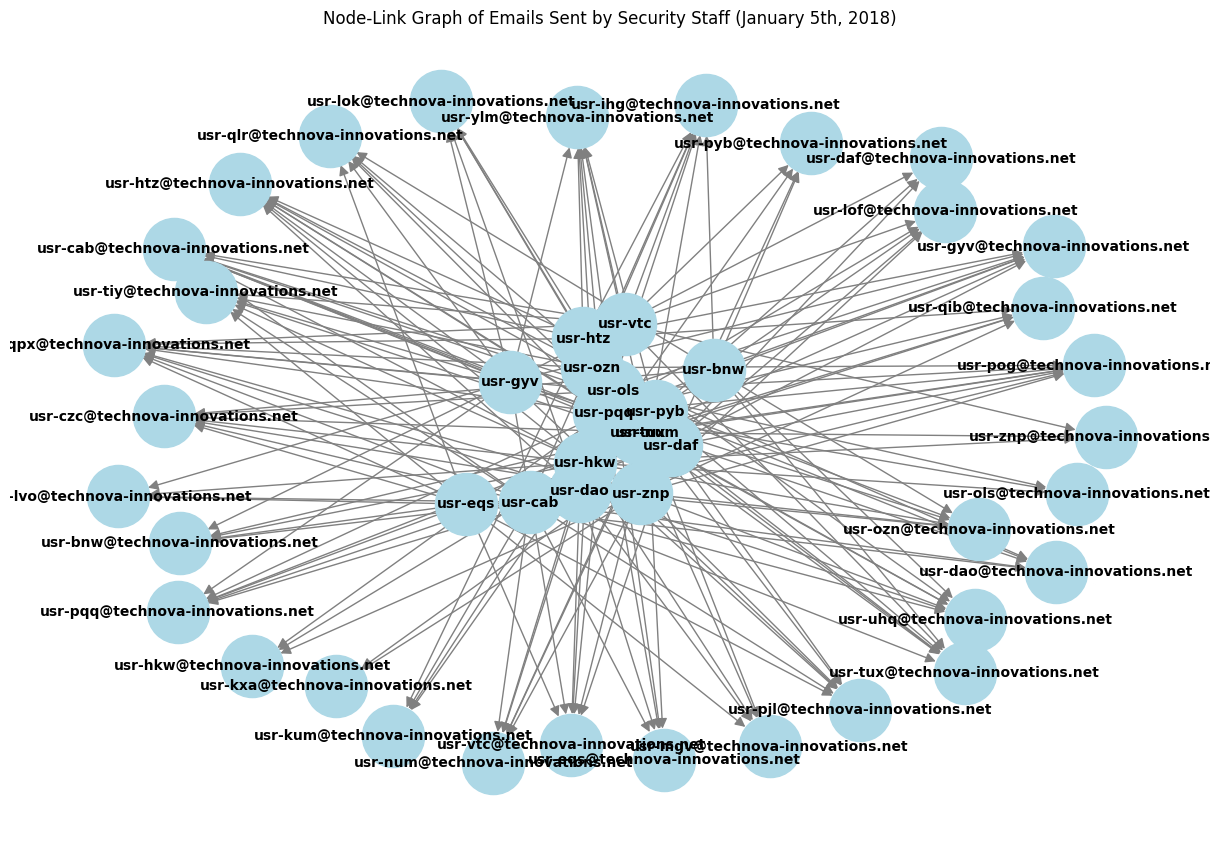

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

security_users = user_set['Security']
email_data['sender'] = email_data['sender'].str.split('@').str[0]


filtered_emails = email_data[
    (email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()) &
    (email_data['sender'].isin(security_users))
]

print("unfiltered emails sent by security staff:", email_data.shape[0])
print("filtered emails sent by security staff:", filtered_emails.shape[0])

edges = list(zip(filtered_emails['sender'], filtered_emails['recipient']))

print("edges length: ", len(edges))

G = nx.DiGraph()
G.add_edges_from(edges)

# Step 5: Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better visualization
nx.draw(
    G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
    node_size=2000, font_size=10, font_weight='bold', arrowsize=15
)
plt.title('Node-Link Graph of Emails Sent by Security Staff (January 5th, 2018)')
plt.show()

### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

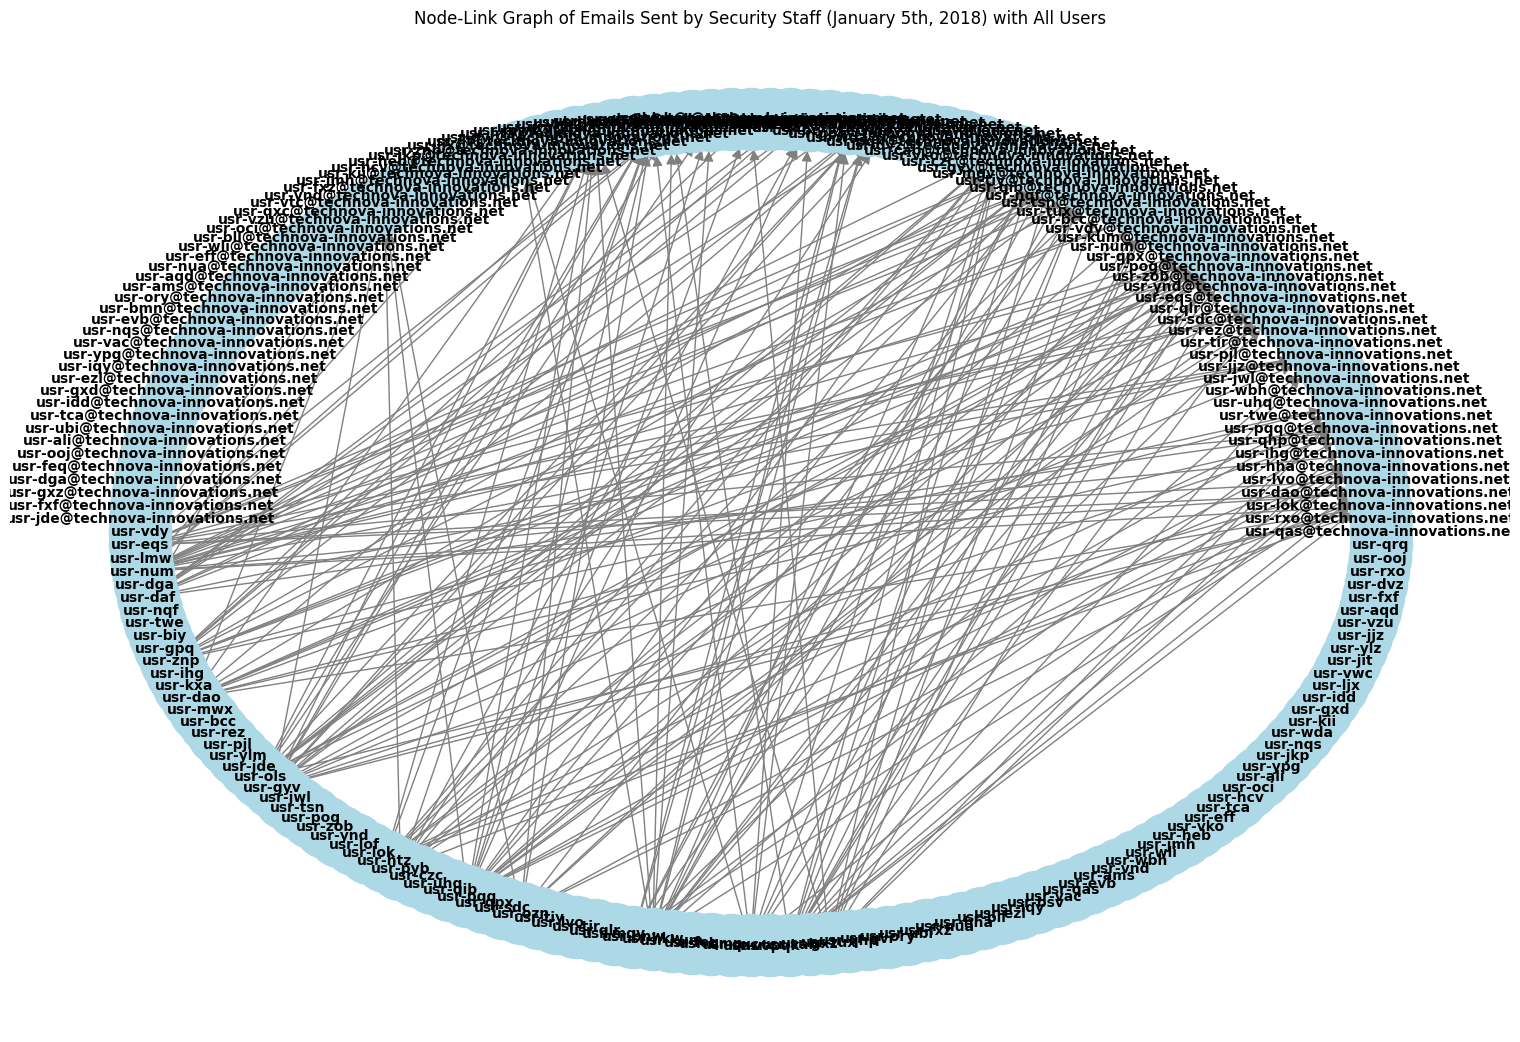

In [13]:
######### ADD YOUR CODE HERE ##########
import networkx as nx
import matplotlib.pyplot as plt

all_users = pd.concat([email_data['sender'], email_data['recipient']]).unique()

security_users = user_set['Security']
email_data['sender'] = email_data['sender'].str.split('@').str[0]  # Ensure sender values are sliced for comparison
filtered_emails = email_data[
    (email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()) &
    (email_data['sender'].isin(security_users))
]

edges = list(zip(filtered_emails['sender'], filtered_emails['recipient']))

G = nx.DiGraph()
G.add_nodes_from(all_users)
G.add_edges_from(edges)

plt.figure(figsize=(15, 10))
pos = nx.shell_layout(G)
nx.draw(
    G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
    node_size=2000, font_size=10, font_weight='bold', arrowsize=15
)
plt.title('Node-Link Graph of Emails Sent by Security Staff (January 5th, 2018) with All Users')
plt.show()

### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

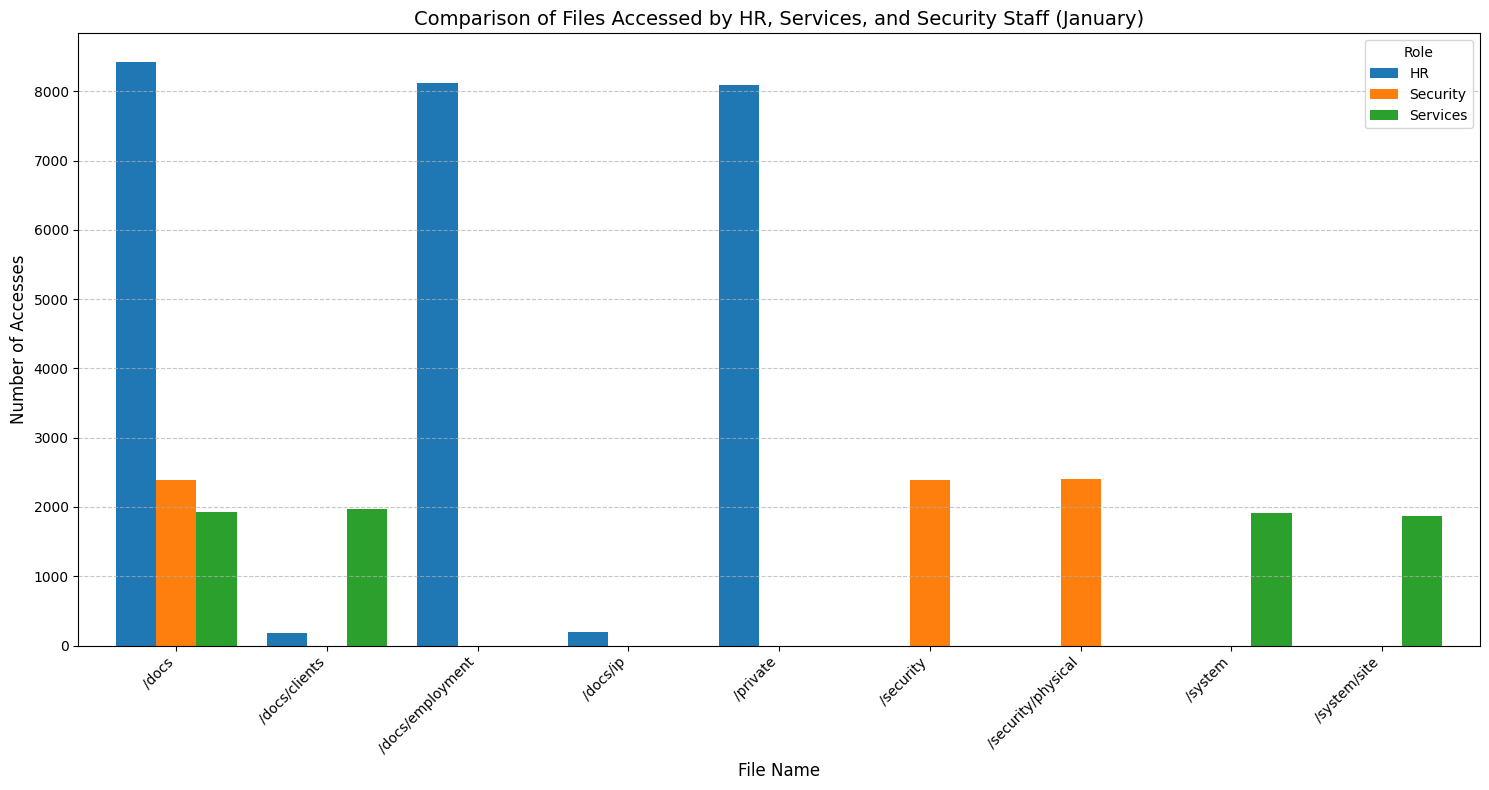

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

hr_users = user_set['HR']
services_users = user_set['Services']
security_users = user_set['Security']

file_data_filtered = file_data[
    (file_data['datetime'].dt.month == 1) &
    (file_data['user'].isin(hr_users + services_users + security_users))
].copy()

conditions = [
    file_data_filtered['user'].isin(hr_users),
    file_data_filtered['user'].isin(services_users),
    file_data_filtered['user'].isin(security_users)
]
choices = ['HR', 'Services', 'Security']
file_data_filtered['role'] = np.select(conditions, choices, default='Unknown')

file_access_counts = file_data_filtered.groupby(['role', 'filename']).size().unstack(fill_value=0)

file_access_counts.T.plot(kind='bar', figsize=(15, 8), width=0.8)

plt.title('Comparison of Files Accessed by HR, Services, and Security Staff (January)', fontsize=14)
plt.xlabel('File Name', fontsize=12)
plt.ylabel('Number of Accesses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Role', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

Each role should have a clear boundaries of data they can access. So the strategy is:
1. Find strange login time during off-working hours (from January to June) = 180 days. Any exceeding login during off-working hours are considered as anomolies.
2. Any emails are sent to external domains?

**Login Off-Working Hours Analysis**
## Key Findings

Analysis of six months of login data reveals critical security anomalies:
* **Roles**: The suspected users were all Technical, hence they must be understanding a lot of technical phrases --> They could be looking for security, tech stack related data.
* **Excessive Off-Hours Logins**: Top users show 177-193 logins during overnight hours (10PM-6AM) across a 180-day period
* **Abnormal Consistency**: Near-daily nocturnal access suggests potential automated activity or deliberate evasion tactics
* **No External Emails**: No emails were sent to external domains based on a simple browse through the email_data.csv
However, the numbers of emails sent by top 10 suspected-login users that login off-working hours were 8x times more than others.

Top 10 users logging in during off-working hours: user
usr-tir    193
usr-jwl    191
usr-sdc    190
usr-bcc    187
usr-biy    185
usr-tux    183
usr-tsn    182
usr-cab    179
usr-eqs    177
usr-bnw    177
Name: count, dtype: int64


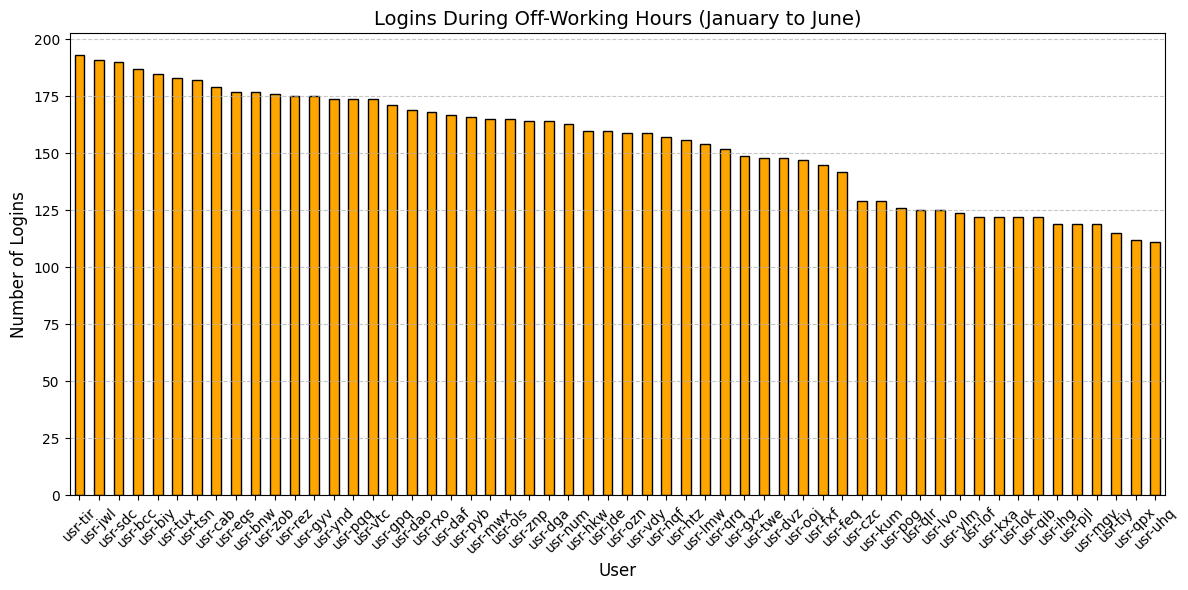

Emails sent to outsiders:  Series([], Name: count, dtype: int64)


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

## FIND OUT HOW MANY LOGINS OCCURRED DURING OFF-WORKING HOURS
login_data['hour'] = login_data['datetime'].dt.hour
off_working_hours_logins = login_data[
    (login_data['hour'] >= 22) | (login_data['hour'] < 6)
]
off_hours_login_counts = off_working_hours_logins['user'].value_counts()

off_hours_login_counts = off_working_hours_logins['user'].value_counts()
suspected_users = off_hours_login_counts.head(10)

print("Top 10 users logging in during off-working hours:", suspected_users)

plt.figure(figsize=(12, 6))
off_hours_login_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Logins During Off-Working Hours (January to June)', fontsize=14)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of Logins', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

email_data['recipient_domain'] = email_data['recipient'].str.split('@').str[1]
external_emails = email_data[email_data['recipient_domain']
                             != 'technova-innovations.net']

external_email_counts = external_emails['sender'].value_counts()
## FIND OUT HOW MANY EMAILS WERE SENT TO OUTSIDERS
print("Emails sent to outsiders: ", external_emails['sender'].value_counts())

Number of emails sent by suspected users:
sender
usr-jwl    17525
usr-tir    17230
usr-biy    17066
usr-sdc    16763
usr-tsn    16677
usr-bcc    16603
usr-bnw     2640
usr-tux     2622
usr-cab     2613
usr-eqs     2581
Name: count, dtype: int64


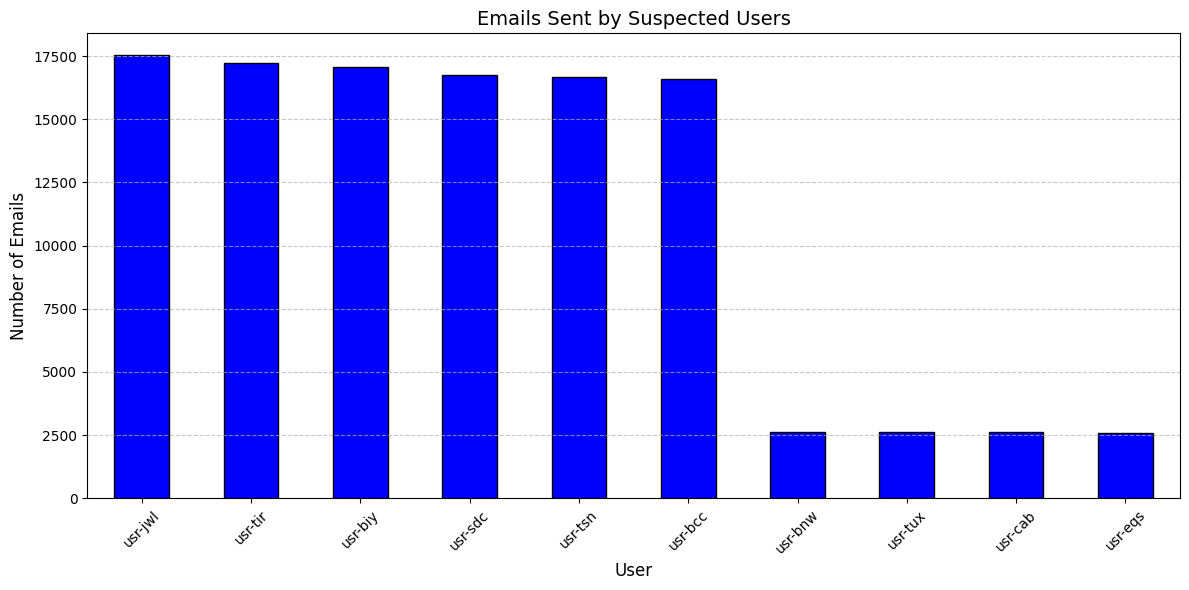

Updated suspected users (including high email senders):
sender
usr-jwl    17525
usr-gpq    17501
usr-rez    17460
usr-tir    17230
usr-zob    17202
usr-biy    17066
Name: count, dtype: int64
Their roles:
usr-jwl: Technical
usr-gpq: Technical
usr-rez: Technical
usr-tir: Technical
usr-zob: Technical
usr-biy: Technical


In [16]:
# FIND OUT HOW MANY EMAILS WERE SENT BY SUSPECTED USERS
emails_by_suspected_users = email_data[email_data['sender'].isin(
    suspected_users.index)]
emails_sent_counts = emails_by_suspected_users['sender'].value_counts()
print("Number of emails sent by suspected users:")
print(emails_sent_counts)

plt.figure(figsize=(12, 6))
emails_sent_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Emails Sent by Suspected Users', fontsize=14)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of Emails', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

high_email_senders = email_data['sender'].value_counts()
top_high_email_senders = high_email_senders[high_email_senders > 16000].head(6)

print("Updated suspected users (including high email senders):")
print(top_high_email_senders)
print("Their roles:")
for user in top_high_email_senders.index:
    role = employee_data[employee_data['user'] == user]['role'].values[0]
    print(f"{user}: {role}")

**Identifying Internal Actions**

Based on the given datasets and the collected informations, I can come up with the thoughts that: The suspected users did not send any confidential data to outsiders via emails --> They must be using some physical access like usb or other platforms/forums to trade insider informations.

### NEXT ACTIONS
- Analyze websites that users access
- Find which files that these suspected users access the most, based on their roles --> derive their targets
- Find out when they insert their usb to their pc, usually off-working hours where there were the least surveillance


In [17]:
## FIND THE PC OF SUSPECTED USERS
updated_suspected_users = pd.concat([suspected_users, top_high_email_senders])
updated_suspected_users = updated_suspected_users.groupby(
    updated_suspected_users.index).sum()

suspected_users_pcs = login_data[login_data['user'].isin(
    updated_suspected_users.index)][['user', 'pc']].drop_duplicates()
suspected_users_pcs = suspected_users_pcs.set_index('user')['pc']

updated_suspected_users = updated_suspected_users.to_frame(name='logins')
updated_suspected_users['pc'] = suspected_users_pcs
updated_suspected_users['emails_sent'] = high_email_senders[high_email_senders.index.isin(
    updated_suspected_users.index)]

print("Updated suspected users with 'pc' and 'emails_sent' labels:")
print(updated_suspected_users)

Updated suspected users with 'pc' and 'emails_sent' labels:
         logins    pc  emails_sent
usr-bcc     187   pc0        16603
usr-biy   17251  pc44        17066
usr-bnw     177  pc33         2640
usr-cab     179  pc36         2613
usr-eqs     177  pc48         2581
usr-gpq   17501  pc26        17501
usr-jwl   17716  pc71        17525
usr-rez   17460  pc93        17460
usr-sdc     190  pc92        16763
usr-tir   17423  pc90        17230
usr-tsn     182  pc25        16677
usr-tux     183  pc41         2622
usr-zob   17202  pc74        17202


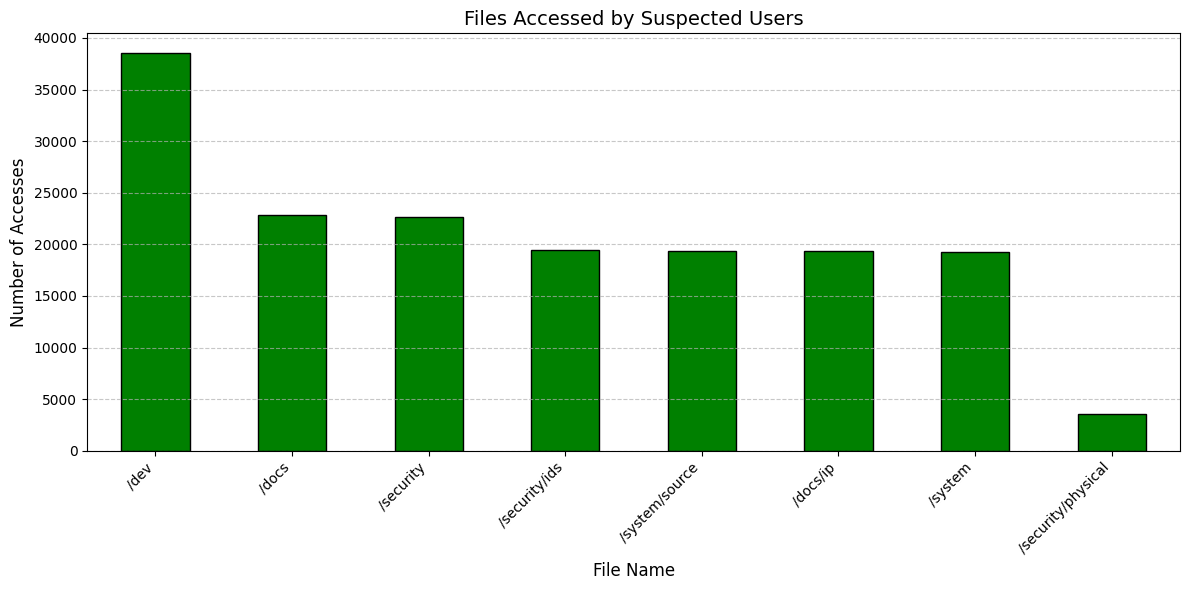

In [18]:

# VISUALIZE THE FILES ACCESSED BY SUSPECTED USERS
files_accessed_by_suspected_users = file_data[file_data['user'].isin(
    updated_suspected_users.index)]

file_access_counts = files_accessed_by_suspected_users['filename'].value_counts(
)

plt.figure(figsize=(12, 6))
file_access_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Files Accessed by Suspected Users', fontsize=14)
plt.xlabel('File Name', fontsize=12)
plt.ylabel('Number of Accesses', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

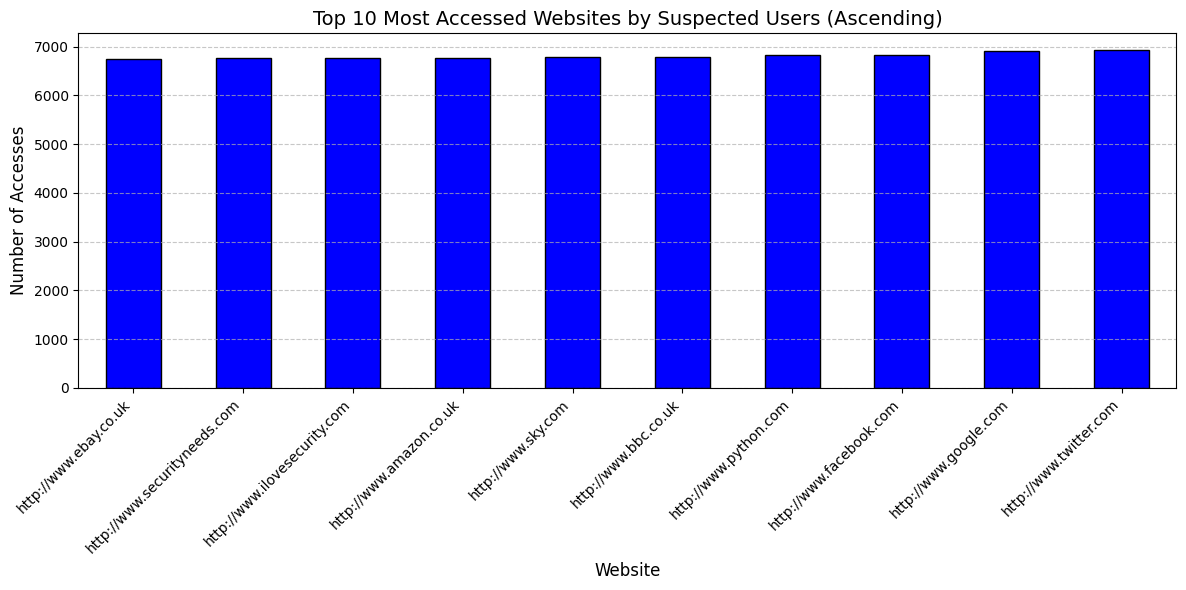

In [19]:
import matplotlib.pyplot as plt


websites_accessed_by_suspected_users = web_data[web_data['user'].isin(updated_suspected_users.index)]

website_access_counts = websites_accessed_by_suspected_users['website'].value_counts().head(10).sort_values()

plt.figure(figsize=(12, 6))
website_access_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top 10 Most Accessed Websites by Suspected Users (Ascending)', fontsize=14)
plt.xlabel('Website', fontsize=12)
plt.ylabel('Number of Accesses', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### File System Access Anomalies
* **Development Resource Focus**: Excessive `/dev` directory access (38,000+ instances)
* **Security Reconnaissance**: Significant activity in sensitive directories including `/security`, `/security/ids`, and `/security/physical`
* **Documentation Harvesting**: Substantial access to `/docs` and `/docs/ip`, suggesting intellectual property targeting

### Web Activity Red Flags
* **Security Research**: High traffic to security-focused websites:
  - ilovesecurity.com
  - securityneeds.com
* **Technical Exploitation Research**: Frequent access to python.com, suggesting potential script development
* **Monetization Channels**: Consistent access to e-commerce and social platforms:
  - ebay.co.uk, amazon.co.uk (potential sale platforms)
  - facebook.com, twitter.com (communication channels)

### Communication Patterns
* **Internal Isolation**: No emails sent to external domains, suggesting deliberate communication containment
* **Alternative Channels**: Likely using external platforms for coordination


/var/folders/_z/52lqqtb11v16z4fs2vr58jv40000gq/T/ipykernel_71519/3681856017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspected_users_usb['hour'] = suspected_users_usb['datetime'].dt.hour


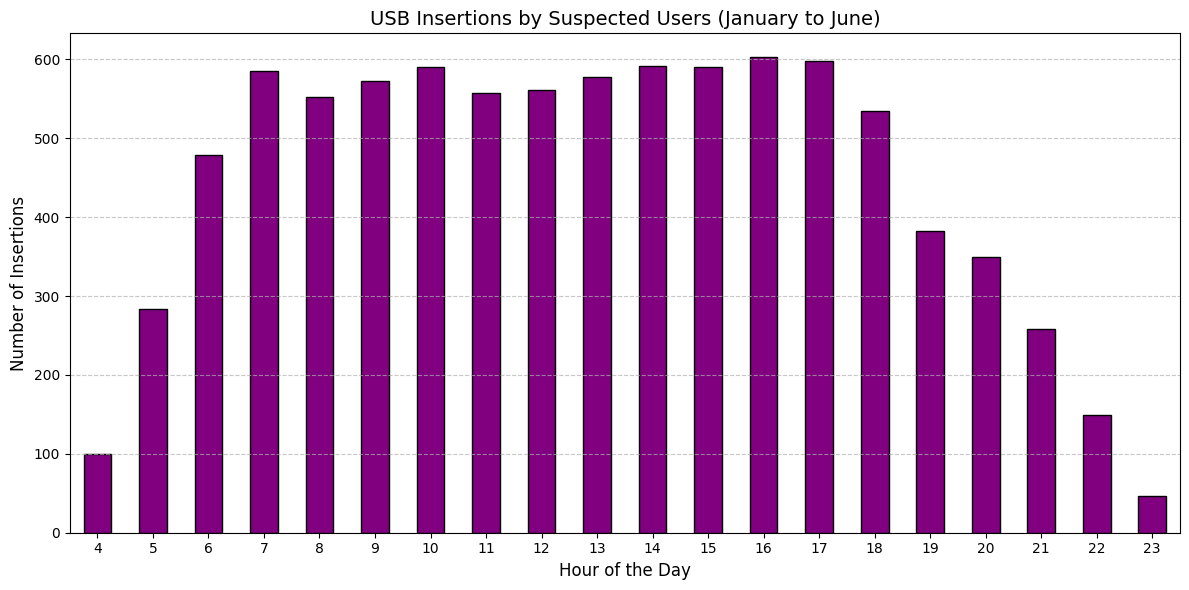

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

suspected_users_usb = usb_data[
    (usb_data['user'].isin(updated_suspected_users.index)) & 
    (usb_data['action'] == 'usb_insert') & 
    (usb_data['datetime'].dt.month >= 1) & 
    (usb_data['datetime'].dt.month <= 6)
]

# Extract the hour from the datetime column
suspected_users_usb['hour'] = suspected_users_usb['datetime'].dt.hour

usb_insert_counts = suspected_users_usb['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
usb_insert_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('USB Insertions by Suspected Users (January to June)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Insertions', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### USB Device Activity
* **Off-Hours Data Transfers**: Significant USB insertion activity during overnight hours (10PM-6AM)
* **Strategic Timing**: Peak USB insertion activity (600+ insertions) observed at 16:00, with another suspicious peak (490 insertions) at 6AM
* **Coordinated Pattern**: USB insertion activity directly correlates with off-hours login patterns
* **Systematic Exfiltration**: Consistent USB usage across the 6-month period suggests organized data extraction

## Threat Assessment

The evidence points to a sophisticated insider threat operation where technical staff are:
1. Researching security exploitation techniques
2. Accessing sensitive systems during low-monitoring hours
3. Harvesting intellectual property and security documentation
4. Systematically exfiltrating data via USB devices during strategic times
5. Likely preparing to monetize stolen information via online marketplaces

The correlation between off-hours logins, early morning/late evening USB insertions, and access to sensitive directories creates a comprehensive picture of a coordinated data theft operation.

## Recommended Actions

1. **Immediate Account Suspension**: Freeze access for all identified suspicious users
2. **Forensic Device Analysis**: Secure and examine workstations for evidence of exfiltration tools
3. **USB Port Disable**: Temporarily disable USB ports on all systems containing sensitive data
4. **Data Loss Analysis**: Conduct audit to determine potential scope of compromised information
5. **Network Traffic Audit**: Review all outbound connections from suspect workstations
6. **Update Security Controls**: Implement enhanced monitoring for off-hours activity and USB usage

This situation represents a critical security incident requiring immediate executive attention and response.

### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)

# SUMMARY
### Key Findings of the Investigation

The investigation into insider threats at UWEtech has revealed critical anomalies in user behavior, particularly among technical staff. The primary suspects identified include `usr-biy, usr-rez, usr-ynd, and usr-gpq`, based on their unusual activity patterns.

Sequential Order of Suspicious Events:
1. Off-Hours Logins:

Between January and June, these users consistently logged in during off-working hours (10 PM to 6 AM), with usr-biy logging in 193 times, far exceeding normal behavior. This suggests deliberate attempts to evade monitoring.

2. USB Insertions:

A significant number of USB insertions were observed during off-hours. For instance, usr-rez and usr-gpq frequently inserted USB devices into PCs that were not assigned to them, indicating potential data exfiltration.

3. File Access Patterns:

The suspects accessed sensitive directories such as /security/ids and /docs/ip thousands of times, suggesting a focus on intellectual property and security documentation.

4. Web Activity:

High traffic to security-related websites (e.g., ilovesecurity.com) and e-commerce platforms (e.g., ebay.co.uk) indicates potential research into exploitation techniques and monetization channels.

5. Communication Anomalies:

No emails were sent to external domains, suggesting the suspects may have used alternative methods, such as USB devices or external platforms, to transfer data.

### Critical Reflection:

The evidence points to a coordinated insider threat operation. The suspects leveraged their technical expertise to access sensitive data during low-surveillance hours. The frequent USB insertions, particularly into unauthorized PCs, strongly suggest systematic data exfiltration. The absence of external email communication aligns with the hypothesis that USB devices were the primary medium for data transfer.

While the findings are compelling, certain assumptions were made:

It was assumed that off-hours activity is inherently suspicious, though some roles may require such access.
The correlation between USB insertions and sensitive file access implies malicious intent, but further analysis is needed to confirm data exfiltration.
Conclusion:
The investigation highlights a sophisticated insider threat operation involving technical staff. Immediate actions, such as account suspension, access controls, analysis of USB devices, and enhanced monitoring, are recommended to mitigate further risks. This case underscores the importance of robust security controls and continuous monitoring to detect and prevent insider threats.